# Curso IML1 - Unidade 1 - Regressão

Análise do conjunto de dados da [Amazon Fine Food Reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews)

Livro: **Aprendizado de máquina: uma abordagem estatística** (http://www.rizbicki.ufscar.br/ame/)

# Upload do conjunto de dados

O conjunto de dados utilizados para demonstração dos métodos é uma amostra do [Amazon Fine Food Reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews).

Para abrir o arquivo, precisamos fazer o upload para o Driver.

In [2]:
# o código abaixa conecta o ambiente em execução com o Google Driver
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


Selecione **Arquivos** no meu lateral esquerdo e clique em **Fazer upload para armazenamento da sessão**.

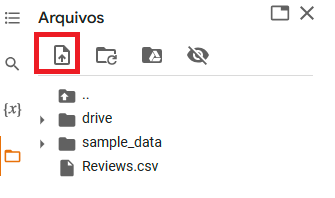

Selecione o arquivo **Reviews.csv** na sua máquina.

# Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import numpy as npbest_estimator_
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import scipy
import matplotlib.pyplot as plt
import re

# modelos
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers

# selecao modelos
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# interpretacao
from sklearn.inspection import PartialDependenceDisplay
#from sklearn.inspection import plot_partial_dependence

# Ler e processar dados

Os dados abrangem um período de mais de 10 anos, incluindo todas as aproximadamente 500.000 análises até outubro de 2012. As análises incluem informações sobre produtos e usuários, classificações e uma análise em texto simples. Também inclui avaliações de todas as outras categorias da Amazon.

In [4]:
# abrindo arquivo
data = pd.read_csv("/content/Reviews.csv", nrows=5000)
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


None

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Nosso objetivo é estimar o score de um review com base no comentário feito. Portanto, vamos utilizar a coluna **Text** para criar as covariáveis e a coluna **Score** será nosso label.

<Axes: >

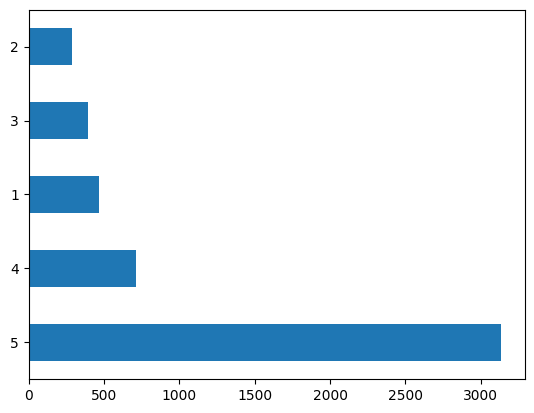

In [5]:
y = data['Score'].copy()
X = data['Text'].copy()

# frequencia da variavel dependente
y.value_counts().plot(kind = 'barh')

## Tratando os dados

Nosso conjunto de treino são os textos dos reviews feitos. Para conseguir utilizar o modelos de ML, precisamos transformar nosso dados em uma matriz de números. Utilizaremos a técnica Bag of Words para criar uma matriz de contagens de palavras.

Etapas que serão aplicadas:
*   Removendo números
*   Passando o texto para minúsculo
*   Dividindo em treino e teste
*   Transformando em matriz de contagens (Bag of Words)




In [6]:
X.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [7]:
# Removendo numeros e passando para minusculo
X = (
    X
    .str.replace('[0-9]+', '', regex = True)
    .str.lower()
    )

X.head()

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price.  there was a wid...
Name: Text, dtype: object

In [8]:
# dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [9]:
# transformando em matriz de contagens
# a palavras serão criadas a partir dos dados de treino
cv = CountVectorizer(max_features = 1500)
X_train = cv.fit_transform(X_train)
# aplicando nos dados de teste
X_test = cv.transform(X_test)
# palabras utilizadas
features = cv.get_feature_names_out()


print(f"Dimensão do conjunto de treino: {X_train.shape}")
X_train.toarray()

Dimensão do conjunto de treino: (3333, 1500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Regressão

Utilizaremos o conjunto de treino para ajustar os modelos e escolheremos o modelo com menor MSE no conjunto de teste.

In [10]:
# dataframe que armazenará o resultado dos modelos
resultados = pd.DataFrame(columns = ['Method', 'MSE'])

In [11]:
# função que plota os n maiores coeficientes positivos e negativos
def plot_coefs(coefs, n):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  coefs.nsmallest(n, 'coef').query('coef < 0').sort_values('coef', ascending = False).plot(kind = 'barh', x = 'features', y = 'coef', color = 'red',  title = 'Coeficientes Negativos', legend=False, ax=ax1)
  coefs.nlargest(n, 'coef').query('coef >= 0').sort_values('coef', ascending = True).plot(kind = 'barh', x = 'features', y = 'coef', color = 'blue', title = 'Coeficientes Possitivos', legend=False, ax=ax2, xlabel = "")
  fig.tight_layout()

In [12]:
# função que plota a Nota real vs Nota Predita
def plot_predict(y_test, y_predict):
  plt.figure()
  plt.scatter(y_test, y_predict)
  plt.xlabel('Nota real')
  plt.ylabel('Nota predita')
  plt.show()

## MMQ

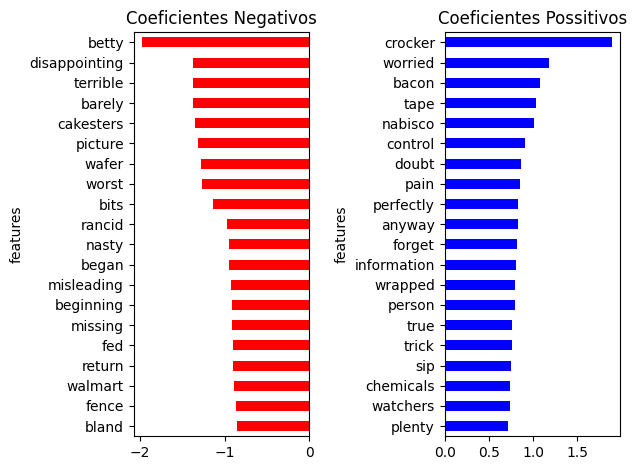

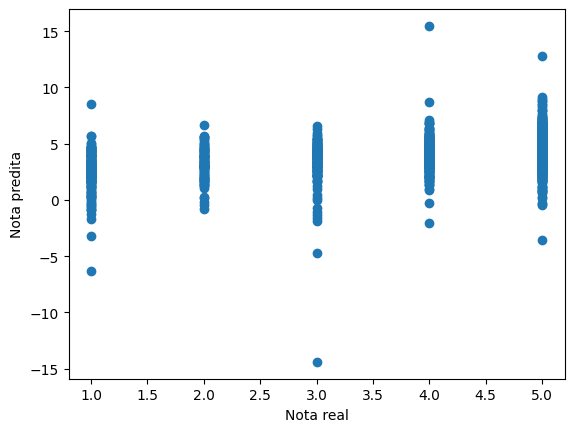

RESULTADOS: 


,Method,MSE
0,Mínimos Quadrados,2.521114


In [13]:
# treinando modelo
linear = linear_model.LinearRegression().fit(X_train, y_train)

# plotando maiores coeficientes
plot_coefs(
    coefs = pd.DataFrame({
        'features': features,
        'coef': linear.coef_
        }),
    n = 20
    )

# plotando nota real x nota predita
plot_predict(y_test, y_predict = linear.predict(X_test))

# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["Mínimos Quadrados"],
    'MSE': [mse(linear.predict(X_test), y_test)]
    }))
print('RESULTADOS: ')
display(resultados)

### Seleção de variáveis

O método do MMQ é sensível a presença de muitas covariáveis correlacionadas entre si e com pouca informação sobre a variável alvo.
Aplicaremos o método [RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html), que elimina de recursos recursivamente com validação cruzada. Em resumo, o modelo é ajustado e as variáveis com menor importância são descartadadas. Esse prodicedimento é aplicador até obter um número mínimo de variáveis.

In [14]:
from sklearn.feature_selection import RFECV
linear = linear_model.LinearRegression()
linear_rfe = RFECV(
    linear, min_features_to_select = 50,
    step = 0.3, verbose = 10, cv=2
    ).fit(X_train,y_train)
print('Variáveis selecionadas: ', features[linear_rfe.support_])

Fitting estimator with 1500 features.
Fitting estimator with 1050 features.
Fitting estimator with 600 features.
Fitting estimator with 150 features.
Fitting estimator with 1500 features.
Fitting estimator with 1050 features.
Fitting estimator with 600 features.
Fitting estimator with 150 features.
Fitting estimator with 1500 features.
Fitting estimator with 1050 features.
Fitting estimator with 600 features.
Fitting estimator with 150 features.
Variáveis selecionadas:  ['area' 'asked' 'avoid' 'awful' 'bacon' 'barely' 'beginning' 'beware'
 'break' 'cant' 'checked' 'chemical' 'china' 'clearly' 'complaint'
 'description' 'disappointed' 'disappointing' 'expiration' 'guess'
 'honest' 'horrible' 'known' 'list' 'luck' 'misleading' 'missing' 'nasty'
 'number' 'perfectly' 'picture' 'positive' 'rancid' 'refreshing' 'return'
 'selling' 'sense' 'spend' 'tape' 'terrible' 'test' 'themselves' 'threw'
 'uses' 'waste' 'watery' 'weak' 'working' 'worse' 'worst']


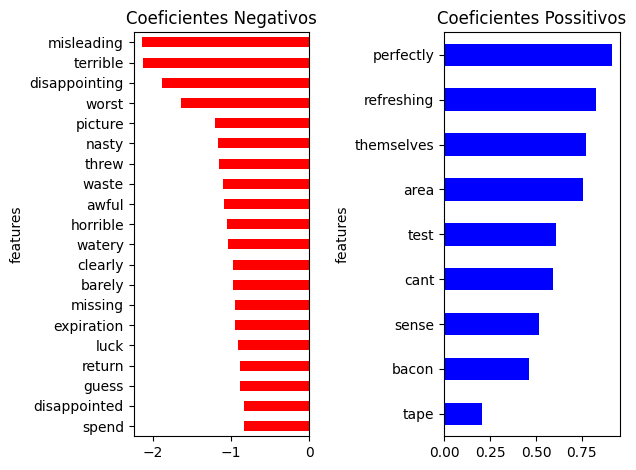

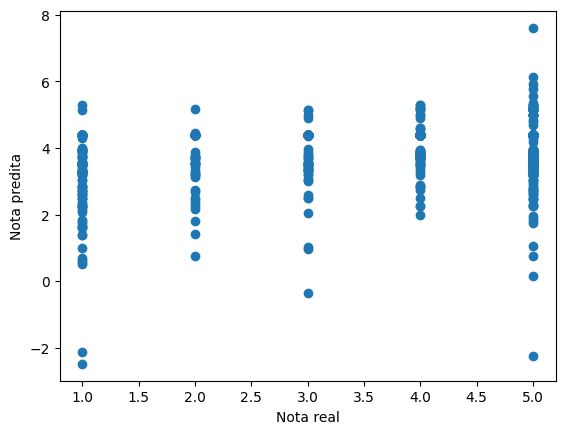

RESULTADOS: 


,Method,MSE
0,Mínimos Quadrados,2.521114
0,Mínimos Quadrados RFE,1.643845


In [15]:
# treinando modelo
linear = linear_model.LinearRegression().fit(X_train[:,linear_rfe.support_],y_train)

# plotando maiores coeficientes
plot_coefs(
    coefs = pd.DataFrame({
        'features':[i for (i, v) in zip(features, linear_rfe.support_) if v],
        'coef':linear.coef_
        }),
    n = 20
    )

# plotando nota real x nota predita
plot_predict(y_test, y_predict = linear.predict(X_test[:,linear_rfe.support_]))

# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["Mínimos Quadrados RFE"],
    'MSE': [mse(linear.predict(X_test[:,linear_rfe.support_]), y_test)]
    }))
print('RESULTADOS: ')
display(resultados)

## Lasso

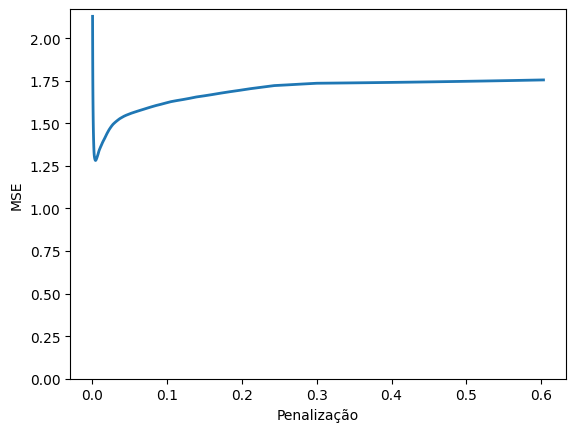

Best Alpha: 0.004561868091420971


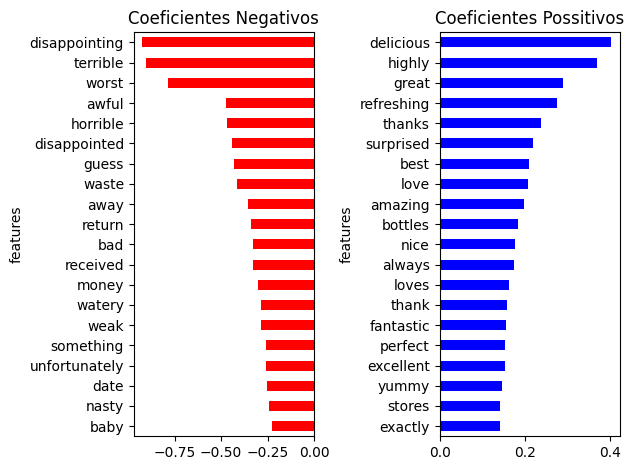

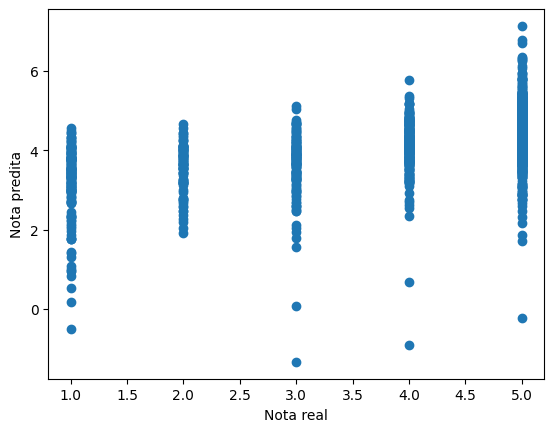

RESULTADOS: 


,Method,MSE
0,Mínimos Quadrados,2.521114
0,Mínimos Quadrados RFE,1.643845
0,Lasso,1.270141


In [16]:
# treinando modelo
lasso = linear_model.LassoCV(cv=2).fit(X_train,y_train)

# plotando MSE x Penalização
plt.figure()
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=-1),linewidth=2)
plt.ylim(bottom=0)
plt.xlabel('Penalização')
plt.ylabel('MSE')
plt.show()

# imprimir melhor alpha
print(f'Best Alpha: {lasso.alpha_}')

# plotando maiores coeficientes
plot_coefs(
    coefs = pd.DataFrame({
        'features':features,
        'coef':lasso.coef_
        }),
    n = 20
    )

# plotando nota real x nota predita
plot_predict(y_test, y_predict = lasso.predict(X_test))

resultados = resultados.append(pd.DataFrame({
    'Method': ["Lasso"],
    'MSE': [mse(lasso.predict(X_test), y_test)]
    }))
print('RESULTADOS: ')
display(resultados)

## KNN

Best Paramns: {'n_neighbors': 23}


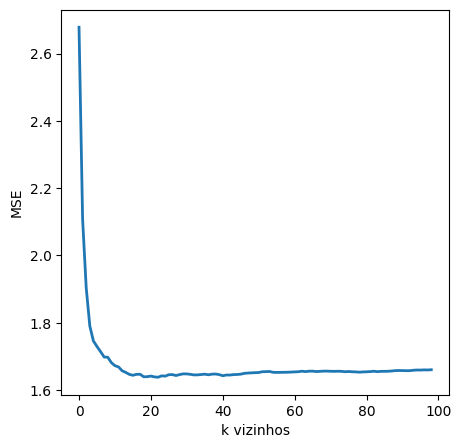

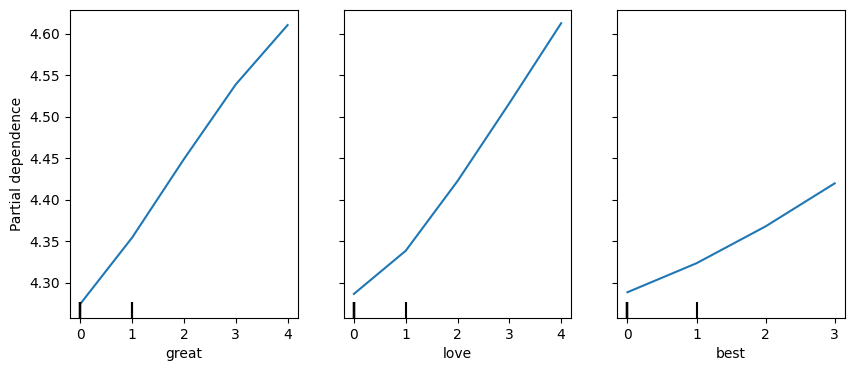

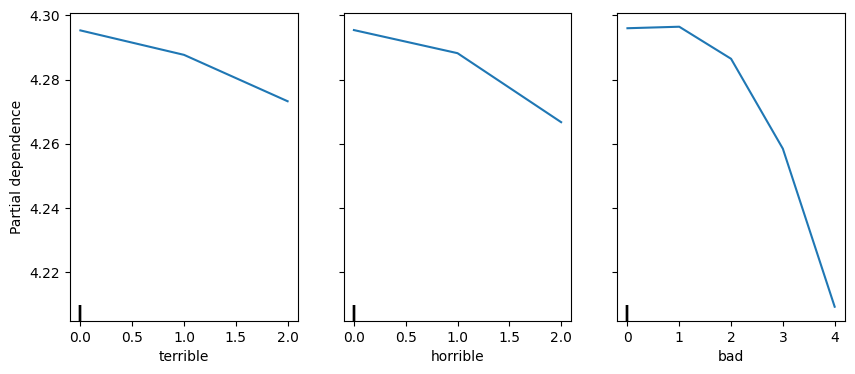

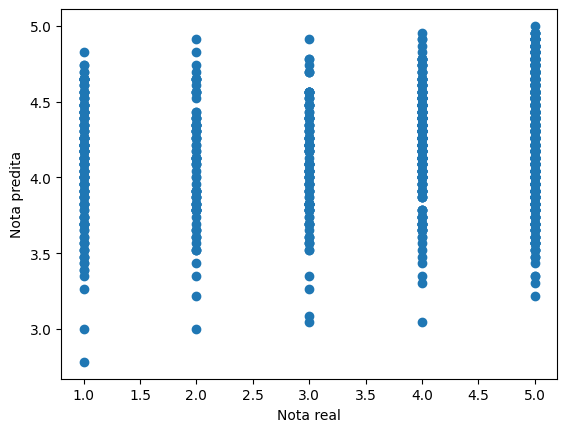

RESULTADOS: 


,Method,MSE
0,Mínimos Quadrados,2.521114
0,Mínimos Quadrados RFE,1.643845
0,Lasso,1.270141
0,KNN,1.629899


In [17]:
# criando modelo
knn = KNeighborsRegressor()

# otimização de hiperparametros
param_grid = {'n_neighbors': np.arange(1, 100)}
knn_gscv = GridSearchCV(knn, param_grid, cv=2,
                        scoring = make_scorer(mse,greater_is_better=False))
knn_gscv.fit(X_train, y_train)

print(f'Best Paramns: {knn_gscv.best_params_}')

plt.figure(figsize=(5, 5))
plt.plot(knn_gscv.cv_results_['mean_test_score']*-1,linewidth=2)
plt.xlabel('k vizinhos')
plt.ylabel('MSE')
plt.show()

# plotando partial dependence
fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(knn_gscv, pd.DataFrame(X_test.todense(), columns=features), ['great','love', 'best'], ax=ax)
fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(knn_gscv, pd.DataFrame(X_test.todense(), columns=features), ['terrible',  'horrible', 'bad'], ax=ax)


# plotando nota real x nota predita
plot_predict(y_test, y_predict=knn_gscv.predict(X_test))

# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["KNN"],
    'MSE': [mse(knn_gscv.predict(X_test), y_test)]
    }))
print('RESULTADOS: ')
display(resultados)

Best Paramns: {'n_neighbors': 9}


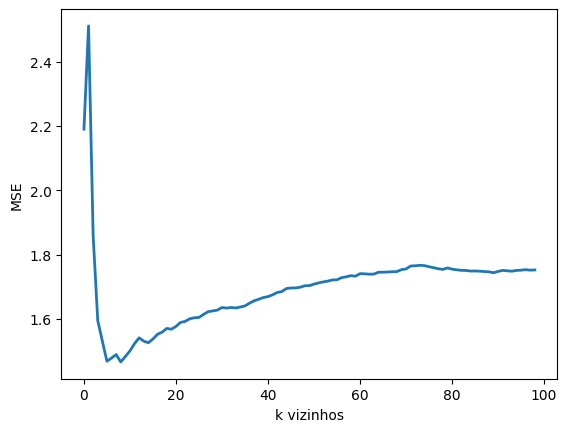

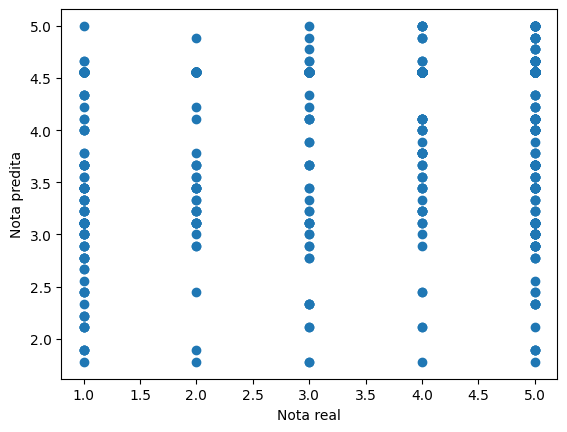

RESULTADOS: 


,Method,MSE
0,Mínimos Quadrados,2.521114
0,Mínimos Quadrados RFE,1.643845
0,Lasso,1.270141
0,KNN,1.629899
0,KNN RFE,1.621283


In [18]:
# criando modelo
knn = KNeighborsRegressor()

# otimização de hiperparametros
param_grid = {'n_neighbors': np.arange(1, 100)}
knn_gscv = GridSearchCV(knn, param_grid, cv=2,
                        scoring = make_scorer(mse,greater_is_better=False))
knn_gscv.fit(X_train[:, linear_rfe.support_], y_train)

print(f'Best Paramns: {knn_gscv.best_params_}')

plt.figure()
plt.plot(knn_gscv.cv_results_['mean_test_score']*-1,linewidth=2)
plt.xlabel('k vizinhos')
plt.ylabel('MSE')
plt.show()

# plotando nota real x nota predita
plot_predict(y_test, y_predict=knn_gscv.predict(X_test[:, linear_rfe.support_]))

# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["KNN RFE"],
    'MSE': [mse(knn_gscv.predict(X_test[:, linear_rfe.support_]), y_test)]
    }))

print('RESULTADOS: ')
display(resultados)

## Árvore

{'max_depth': 2}


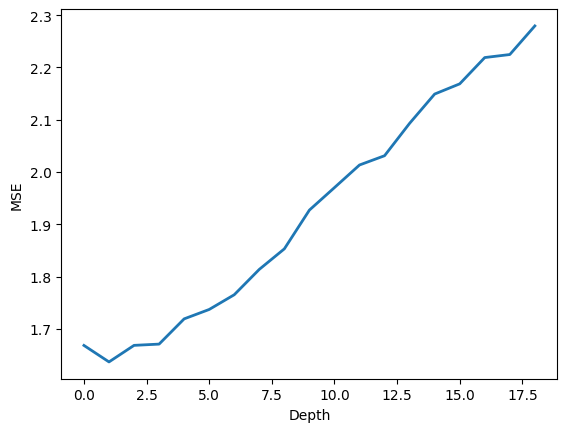

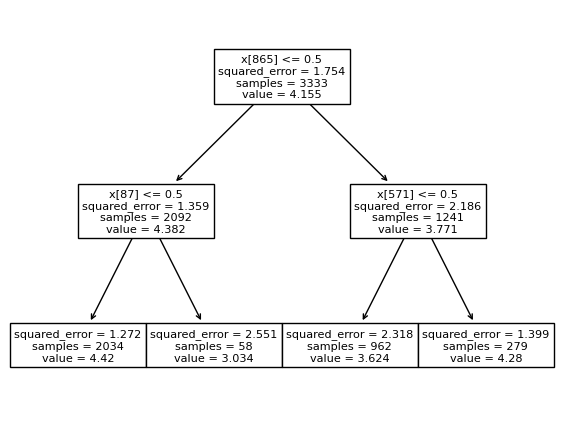

RESULTADOS: 


,Method,MSE
0,Mínimos Quadrados,2.521114
0,Mínimos Quadrados RFE,1.643845
0,Lasso,1.270141
0,KNN,1.629899
0,KNN RFE,1.621283
0,Árvore de Decisão,1.609364


In [19]:
# criando modelo
tree = DecisionTreeRegressor()

# otimização de hiperparametros
param_grid = [{'max_depth':np.arange(1, 20)}]
tree_gscv = GridSearchCV(tree, param_grid, cv=2,scoring=make_scorer(mse,greater_is_better=False))
tree_gscv.fit(X_train, y_train)
print(tree_gscv.best_params_)

plt.figure()
plt.plot(tree_gscv.cv_results_['mean_test_score']*-1,linewidth=2)
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.show()

# plotando coeficientes mais importantes
fig, ax = plt.subplots()
(
    pd.DataFrame({
      'features': features, 'coef': tree_gscv.best_estimator_.feature_importances_})
    .nlargest(4, 'coef')
    .sort_values('coef', ascending = True)
    .plot(kind = 'barh', x = 'features', y = 'coef', color = 'blue',  title = 'Coeficientes mais importantes', legend=False, ax=ax)
)
fig.tight_layout()


# plotando arvore de decisão
plot_tree(tree_gscv.best_estimator_)
plt.show()

# salvando resultado
resultados = resultados.append(pd.DataFrame({
    'Method': ["Árvore de Decisão"],
    'MSE': [mse(tree_gscv.predict(X_test), y_test)]
    }))

print('RESULTADOS: ')
display(resultados)

## Floresta

{'max_depth': 18}


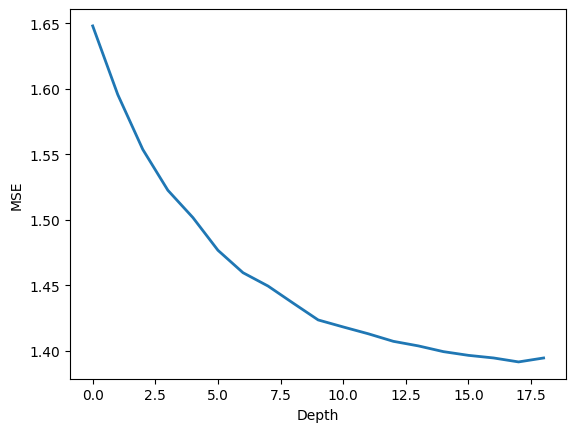

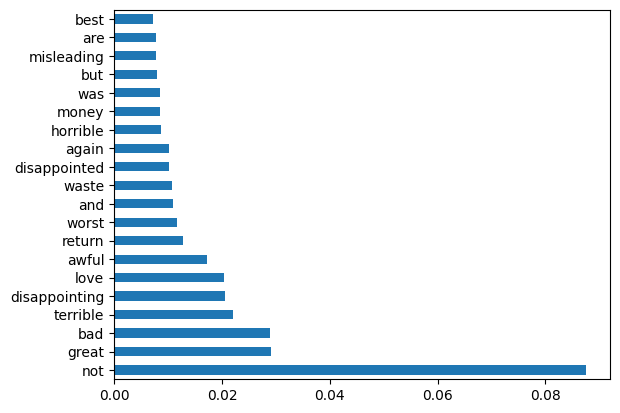

RESULTADOS: 


,Method,MSE
0,Mínimos Quadrados,2.521114
0,Mínimos Quadrados RFE,1.643845
0,Lasso,1.270141
0,KNN,1.629899
0,KNN RFE,1.621283
0,Árvore de Decisão,1.609364
0,Floresta,1.345515


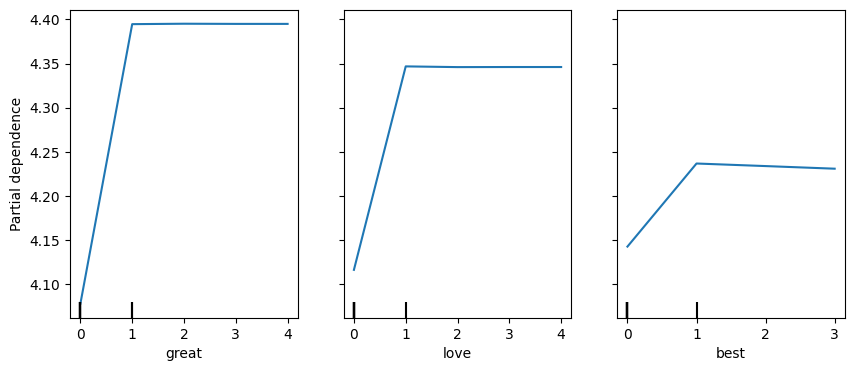

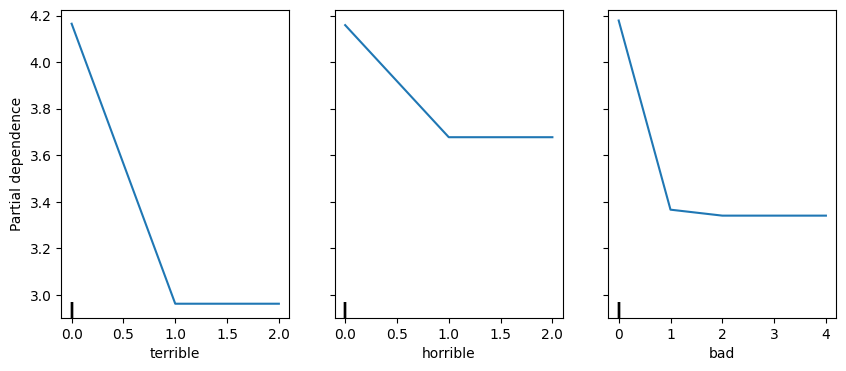

In [20]:
# criando modelo
floresta = RandomForestRegressor(random_state = 0)

# otimização de hiperparametros
param_grid = [{'max_depth':np.arange(1, 20)}]
floresta_gscv = GridSearchCV(floresta, param_grid, cv=2,scoring=make_scorer(mse,greater_is_better=False))
floresta_gscv.fit(X_train, y_train)
print(floresta_gscv.best_params_)

plt.figure()
plt.plot(floresta_gscv.cv_results_['mean_test_score']*-1,linewidth=2)
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.show()

# utilizando o melhores parametros
floresta.set_params(**floresta_gscv.best_params_)
floresta.fit(X_train,y_train)

# plotando as variaveis mais importantes
feat_importances = pd.Series(floresta.feature_importances_, index = features)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# plotando partial dependence
fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(floresta, pd.DataFrame(X_test.todense(), columns=features), ['great','love', 'best'], ax=ax)
fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(floresta, pd.DataFrame(X_test.todense(), columns=features), ['terrible',  'horrible', 'bad'], ax=ax)

# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["Floresta"],
    "MSE": [mse(floresta.predict(X_test), y_test)]
    }))

print('RESULTADOS: ')
display(resultados)

## XGBoost

{'colsample_bytree': 0.75, 'eta': 0.1, 'max_depth': 12, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 1}


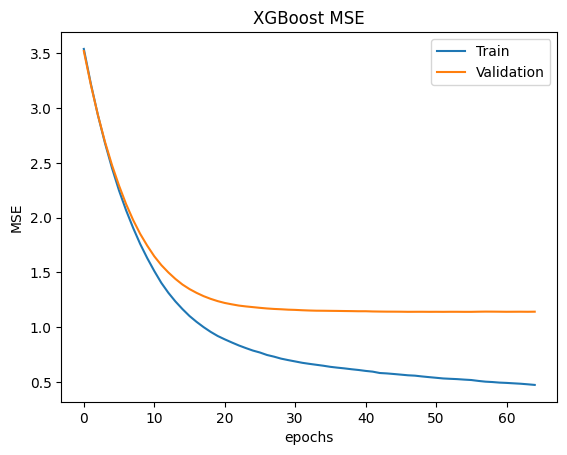

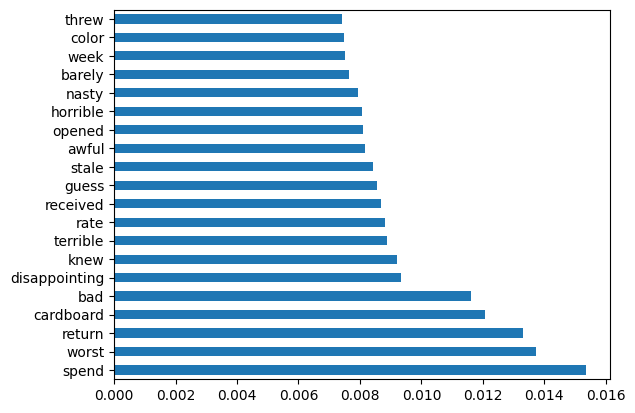

                  Method       MSE
0      Mínimos Quadrados  2.521114
0  Mínimos Quadrados RFE  1.643845
0                  Lasso  1.270141
0                    KNN  1.629899
0                KNN RFE  1.621283
0      Árvore de Decisão  1.609364
0               Floresta  1.345515
0                XGBoost  1.241098


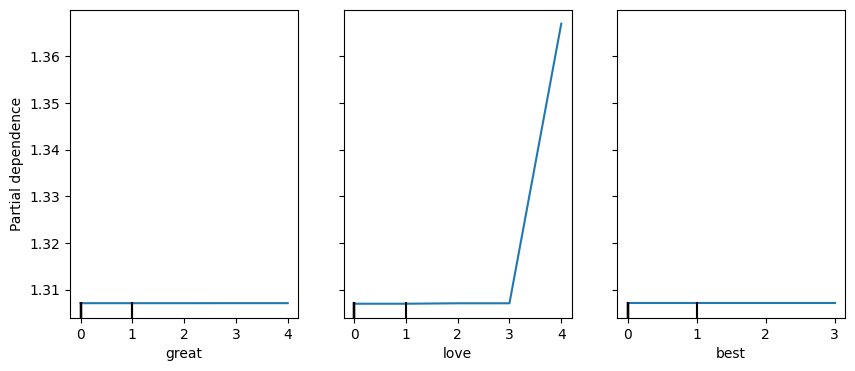

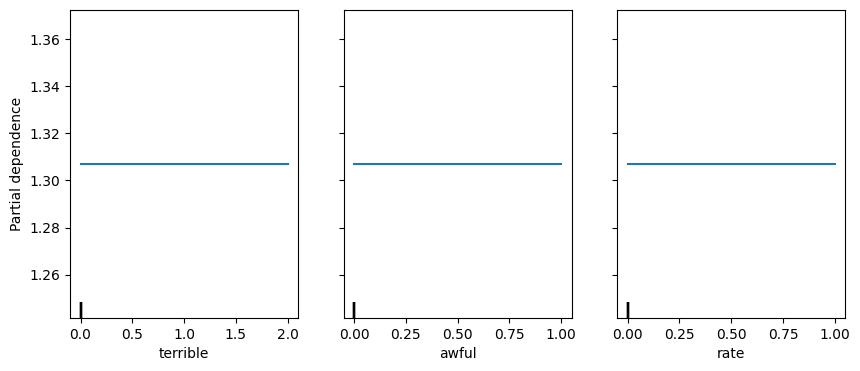

In [21]:
# criando modelo
xgb_model = xgb.XGBRegressor()

# otimização de hiperparametros
parameters = {'max_depth': [3,7,12],
              'min_child_weight': [5,10,20],
              'subsample': [0.8,1],
              'colsample_bytree': [0.75,1],
              'n_estimators': [400],
              'eta':[0.01,0.1,0.5]}

X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=7)
eval_set = [(X_train_1,y_train_1),(X_val, y_val)]

xgb_model_gscv = GridSearchCV(xgb_model, parameters, n_jobs=4, cv=2,scoring=make_scorer(mse,greater_is_better=False))
xgb_model_gscv.fit(
    X_train_1, y_train_1,
    eval_set=eval_set,eval_metric="rmse",
    verbose=0,early_stopping_rounds=10)

print(xgb_model_gscv.best_params_)
xgb_results = xgb_model_gscv.best_estimator_.evals_result()

# plot
epochs = len(xgb_results['validation_0']['rmse'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, xgb_results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, xgb_results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.title('XGBoost MSE')
plt.show()

# plotando as variaveis mais importantes
feat_importances = pd.Series(xgb_model_gscv.best_estimator_.feature_importances_, index = features)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# plotando partial dependence
fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(xgb_model_gscv, pd.DataFrame(X_test.todense(), columns=features), ['great','love', 'best'], ax=ax)
fig, ax = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(xgb_model_gscv, pd.DataFrame(X_test.todense(), columns=features), ['terrible',  'awful', 'rate'], ax=ax)


# salvando resultados
resultados = resultados.append(pd.DataFrame({
    'Method': ["XGBoost"],
    'MSE': [mse(xgb_model_gscv.predict(X_test), y_test)]
    }))

print(resultados)

## NNets

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                45030     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 45,761
Trainable params: 45,761
Non-traina

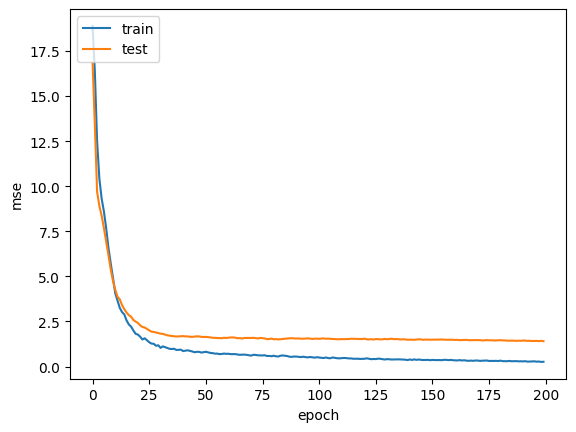

53/53 [==============================] - 0s 2ms/step
                  Method       MSE
0      Mínimos Quadrados  2.521114
0  Mínimos Quadrados RFE  1.643845
0                  Lasso  1.270141
0                    KNN  1.629899
0                KNN RFE  1.621283
0      Árvore de Decisão  1.609364
0               Floresta  1.345515
0                XGBoost  1.241098
0                  NNets  1.417404


In [22]:
batch_size = 200
epochs = 200
model = keras.Sequential(
    [
        keras.Input(shape=X_train.shape[1]),
        layers.Dense(30, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(20, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(5, activation="relu"),
        layers.Dense(1, activation="linear"),
    ]
    )

model.summary()

model.compile(loss="mse", optimizer="adam", metrics=["mae"])

X_train_dense = X_train.todense()
X_test_dense  = X_test.todense()

history = model.fit(
    X_train_dense, y_train,
    batch_size=batch_size,
    epochs=epochs, validation_split=0.1,
    shuffle=True,verbose=0
    )

# plotando MSE
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# salvando resultados
mse_estimate=mse(model.predict(X_test_dense), y_test)
resultados = resultados.append(pd.DataFrame({
    'Method': ["NNets"],
    'MSE': [mse_estimate]
    }))

print(resultados)

In [23]:
resultados

,Method,MSE
0,Mínimos Quadrados,2.521114
0,Mínimos Quadrados RFE,1.643845
0,Lasso,1.270141
0,KNN,1.629899
0,KNN RFE,1.621283
0,Árvore de Decisão,1.609364
0,Floresta,1.345515
0,XGBoost,1.241098
0,NNets,1.417404
